In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
print('Nulls \n====')
print(df.isnull().sum())

print("0s")
print("==")
print(df.eq(0).sum())

Nulls 
====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [4]:
# replace 0 by NaN and fill with mean value
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness',
'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.fillna(df.mean(), inplace = True)
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [5]:
corr = df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

c:\Users\ftvde\Envs\learnML\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


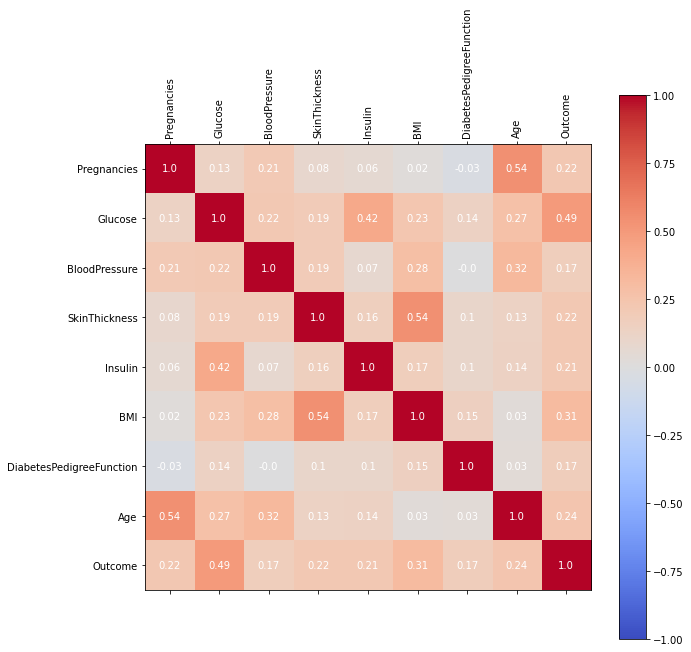

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)
#---print the correlation factor---
for i in range(df.shape[1]):
  for j in range(9):  
    text = ax.text(j, i, round(corr.iloc[i][j],2),ha="center", va="center", color="w")
plt.show()

In [7]:
print(df.corr().nlargest(4, 'Outcome').index) # find 4 features highest correlation
print(df.corr().nlargest(4, 'Outcome').values[:,8])

# overfitting

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598]


Evaluating the Algorithms

K-fold cross validation: Khi có ít dữ liệu train thay vì dùng train_test_split chia 80/20 (có thể có dữ liệu chỉ có trong val mà k có trong train do bị chia random -> dẫn đến đánh giá k công bằng) khi đó dùng kfold cv

Phần dữ liệu training được chia ngẫu nhiên thành k phần (tham số cv thường chọn 5 hoặc 10). Sau đó train model K lần mỗi lần có k-1 phần làm training data và 1 phần làm validation data. Kết quả cuối là trung bình cộng K lần train model

Sau khi đánh giá xong có 2 cách tạo ra model cuối: 
- Cách 1: Trong quá trình train lưu lại model tốt nhất (ưu: không cần train lại, nhược: model không được nhìn toàn bộ data)
- Cách 2: train lại model với toàn bộ dữ liệu (không chia thành validation và training data), sau đó save lại và mang đi predict với test data để xem kết quả  

In [8]:
# !Note: ngoài ra còn có Stratified K-Fold CV 

! Ở đây chỉ dùng k-fold cv để đánh giá các thuật toán khác nhau, không lưu lại fold trong quá trình train 

In [9]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df[['Glucose','BMI','Age']]
#---label---
y = df.iloc[:,8]
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,
scoring='accuracy').mean()
print(log_regress_score)

0.7669856459330144


In [10]:
result = []
result.append(log_regress_score)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []

#---number of folds---
folds = 10
#---creating odd list of K for KNN--- (tạo mảng số lẻ cho knn)
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))

#---perform k-fold cross validation---
# Trong các K trong mảng ks, tính k-fold và lưu vào cv_scores, sau đó lấy score lớn nhất và K tương ứng lưu lại vào result để so sánh với thuật toán khác
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
  cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 19
0.7721462747778537


In [12]:
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

0.7656527682843473


In [13]:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.765704032809296


In [14]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM LinearKernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms, columns=["Accuracy"])
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.772146
Logistic Regression,0.766986
SVM RBF Kernel,0.765704
SVM LinearKernel,0.765653


In [15]:
# Sau khi có được knn là thuật toán tốt nhất, train lại model (cách 2) với toàn bộ data
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [16]:
import pickle
#---save the model to disk---
filename = 'diabetes.sav'
#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))

In [17]:
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))

In [18]:
Glucose = 65
BMI = 70
Age = 50
prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
  print("Non-diabetic")
else:
  print("Diabetic")

[0]
Non-diabetic


c:\Users\ftvde\Envs\learnML\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [19]:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.94736842 0.05263158]]
Confidence: 94.74%


c:\Users\ftvde\Envs\learnML\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
